# Chapter 1 - Introduction

<br></br><br></br>
## 1 금융모델의 구현
build model by Python

### 01 블랙 숄즈 머튼의 옵션가격설정
BSM Model

In [1]:
# Ipython 환경설정
# from pylab import plt
# plt.style.use('ggplot')
# import matplotlib as mpl
# mpl.rcParams['font.family'] = 'serif'

In [2]:
S0 = 100.     # 초기 Euro 주가지수
K = 105.      # 유러피안 콜옵션 행사가
T = 1.0       # 만기 - 1년
r = 0.05      # 무위험 단기 이자율(3년국채)
sigma = 0.2   # 변동성 Beat값

In [3]:
# Numpy를 활용한 옵션가격 예측
from numpy import *
I = 100000     # 몬테카를로 시뮬레이션 횟수

random.seed(1000)
z = random.standard_normal(I)   # 의사난수
print('length of Z :' ,len(z)); z

length of Z : 100000


array([-0.8044583 ,  0.32093155, -0.02548288, ...,  2.05563421,
       -0.31621237, -0.19326188])

In [4]:
ST = S0 * exp(r * T + sigma * sqrt(T) * z)
hT = maximum(ST - K, 0)
C0 = exp(-r * T) * sum(hT) / I

print("Value of the European Call Option %5.3f" % C0)

Value of the European Call Option 9.149


### 02 블랙 숄즈 머튼 옵션의 함수설정
Valuation of European call options in Black-Scholes-Merton model

In [5]:
# Analytical Black-Scholes-Merton (BSM) Formula
# 파라미터
# S0 : float (초기 주가지수)
# K  : float (행사가격)
# T  : float (만기까지 남은 기간 (연 단위))
# r  : float (고정 무위험 단기 이자율)
# sigma : float (변동성 파라미터)
# Return값
# value : float (유러피안 콜 옵션의 현재가격)

In [6]:
def bsm_call_value(S0, K, T, r, sigma):
    from math import log, sqrt, exp
    from scipy import stats
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)
            - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

In [7]:
# 베가 계산함수 (Vega function)
# 파라미터 
# S0 : float (초기 주가지수)
# K  : float (행사가격)
# T  : float (만기까지 남은 기간 (연 단위))
# r  : float (고정 무위험 단기 이자율)
# sigma : float (변동성 파라미터)
# Return값
# vega : float (BSM 공식을 변동성에 대해 1차 미분한 값. Vega)

In [8]:
def bsm_vega(S0, K, T, r, sigma):
    from math import log, sqrt
    from scipy import stats
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    vega = S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

In [9]:
# 내재 변동성 계산함수 (Implied volatility function)
# 파라미터
# S0 : float (초기 주가지수)
# K  : float (행사가격)
# T  : float (만기까지 남은 기간 (연 단위))
# r  : float (고정 무위험 단기 이자율)
# sigma_est : float (변동성 파라미터 초기 추정치)
# it : integer (반복 계산 횟수)
# Return값
# simga_est : float (수치적으로 추정한 내재 변동성)

In [10]:
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0)
                        / bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est

###  03 금융데이터 불러오기 및 가공하기
by Google Finance

In [11]:
import numpy as np
import pandas as pd
from pandas_datareader import get_data_google

goog = get_data_google('GOOG','2009-3-14','2014-4-13')
goog.index.name = u'Date'
goog.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-07,540.74,548.48,527.15,538.15,4389569.0
2014-04-08,542.60,555.00,541.61,554.90,3152406.0
2014-04-09,559.62,565.37,552.95,564.14,3324742.0
2014-04-10,565.00,565.00,539.90,540.95,4027743.0
2014-04-11,532.55,540.00,526.53,530.60,3916171.0


In [12]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
goog['Volatility'] = goog['Log_Ret'].rolling(window=252).std() * np.sqrt(252)

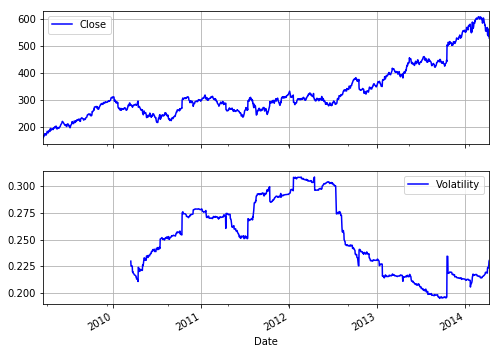

In [13]:
%matplotlib inline
# subplots=True : 객체를 개별 Map에 그린다
goog[['Close', 'Volatility']].plot(subplots=True, 
                                   color='blue', figsize=(8, 6), grid=True);
# title: Google closing prices and yearly volatility

### 04 최대 성능 활용하기
Paradigm

In [14]:
# 2천500만 [ list 반복문을 사용] : 10s
loops = 25000000
# from math import *
# a = range(1, loops)
# def f(x):
#     return 3 * log(x) + cos(x) ** 2
# %timeit r = [f(x) for x in a]

In [15]:
# 2천500만 Numpy 활용 : 1.5s
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

1 loop, best of 3: 1.54 s per loop


In [16]:
# 2천500만 numexpr 활용 (배열의 메모릴 복사작업을 활용) : 1.44s
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

1 loop, best of 3: 1.46 s per loop


In [17]:
# 2천500만 numexpr을 여러개 Thread 모두 활성화 : 0.552 s
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

1 loop, best of 3: 523 ms per loop


<br></br><br></br>
## 2 Example
입문용 예제

In [18]:
# 내재 변동성 : 내재된 변동성을 계산하고, 이를 시각화
# 몬테카를로 시뮬레이션 : 시간에 따른 주가변화를 Simulation
# 가치분석/ 기술적 분석

### 01 내재 변동성 계산
Implied Volatilities

In [19]:
# Hadoop Data reader
import pandas as pd
h5 = pd.HDFStore('./data/vstoxx_data_31032014.h5', 'r')
futures_data = h5['futures_data']  # VSTOXX futures data
options_data = h5['options_data']  # VSTOXX call option data
h5.close()
futures_data.head(2)

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,1396224000000000000,2014,4,17.85,1397779200000000000,0.049
497,1396224000000000000,2014,5,19.55,1400198400000000000,0.126


In [20]:
# 선물데이터 Datetime 변환 (TimeStemp to Datetime)
from datetime import datetime
futures_data['DATE'] = futures_data['DATE'].apply(lambda x: datetime.fromtimestamp(x / 1e9))
futures_data['MATURITY'] = futures_data['MATURITY'].apply(lambda x: datetime.fromtimestamp(x / 1e9))
futures_data.head(2)

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,2014-03-31 09:00:00,2014,4,17.85,2014-04-18 09:00:00,0.049
497,2014-03-31 09:00:00,2014,5,19.55,2014-05-16 09:00:00,0.126


In [21]:
# 옵션데이터 Datetime 변환 (TimeStemp to Datetime)
options_data['DATE'] = options_data['DATE'].apply(lambda x: datetime.fromtimestamp(x / 1e9))
options_data['MATURITY'] = options_data['MATURITY'].apply(lambda x: datetime.fromtimestamp(x / 1e9))
options_data.head(2)

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM
46170,2014-03-31 09:00:00,2014,4,C,1.0,16.85,2014-04-18 09:00:00,0.049
46171,2014-03-31 09:00:00,2014,4,C,2.0,15.85,2014-04-18 09:00:00,0.049


In [22]:
options_data[['DATE', 'MATURITY', 'TTM', 'STRIKE', 'PRICE']].head(2)

,DATE,MATURITY,TTM,STRIKE,PRICE
46170,2014-03-31 09:00:00,2014-04-18 09:00:00,0.049,1.0,16.85
46171,2014-03-31 09:00:00,2014-04-18 09:00:00,0.049,2.0,15.85


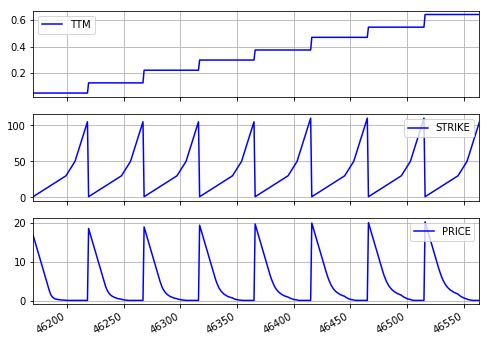

In [23]:
options_data[['DATE', 'MATURITY', 'TTM', 'STRIKE', 'PRICE']].plot(subplots=True, 
                                   color='blue', figsize=(8, 6), grid=True);

In [24]:
V0 = 17.6639
r = 0.01

options_data['IMP_VOL'] = 0.0 # 내재 변동성을 저장할 새로운 Column 값 지정
tol = 0.5  # 콜옵션의 내재 변동성 계산

In [25]:
# 머니니스 범위
for option in options_data.index:
    # 모든 옵션 시장가에 대해 반복 
    forward = futures_data[futures_data['MATURITY'] == \
                options_data.loc[option]['MATURITY']]['PRICE'].values[0]
    # 옵션과 만기가 일치하는 선물을 선택
    if (forward * (1 - tol) < options_data.loc[option]['STRIKE']
                             < forward * (1 + tol)):
        # 머니니스 범위내 옵션 선택
        imp_vol = bsm_call_imp_vol(  # 내재 변동성 계산함수 (
                V0,  # VSTOXX 지수값 
                options_data.loc[option]['STRIKE'],
                options_data.loc[option]['TTM'],
                r,   # 단기 이자율
                options_data.loc[option]['PRICE'],
                sigma_est=2.,  # 내재 변동성의 초기 측정치
                it=100)

        options_data.ix[option, 'IMP_VOL'] = imp_vol

### 02 내재 변동성 시각화
Implied volatilities (of volatility) for European call options on the VSTOXX

In [26]:
# 내재변동성이 계산된 Date 자료만 추출한다
plot_data = options_data[options_data['IMP_VOL'] > 0]
maturities = sorted(set(options_data['MATURITY']))
maturities

[Timestamp('2014-04-18 09:00:00'),
 Timestamp('2014-05-16 09:00:00'),
 Timestamp('2014-06-20 09:00:00'),
 Timestamp('2014-07-18 09:00:00'),
 Timestamp('2014-08-15 09:00:00'),
 Timestamp('2014-09-19 09:00:00'),
 Timestamp('2014-10-17 09:00:00'),
 Timestamp('2014-11-21 09:00:00')]

/home/markbaum/Python/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


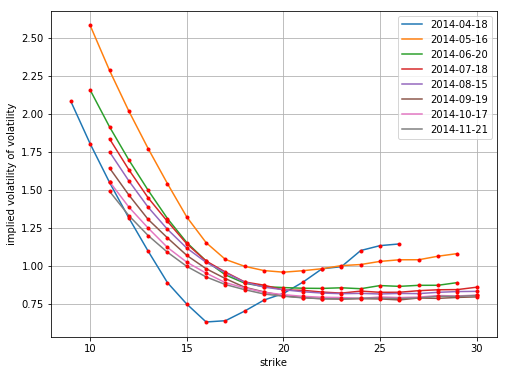

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# select data for this maturity
for maturity in maturities:
    data = plot_data[options_data.MATURITY == maturity]
    plt.plot(data['STRIKE'], data['IMP_VOL'], label=maturity.date(), lw=1.5)
    plt.plot(data['STRIKE'], data['IMP_VOL'], 'r.', label='')
plt.grid(True) ;plt.xlabel('strike') ;plt.ylabel('implied volatility of volatility')
plt.legend(); plt.show()

In [28]:
keep = ['PRICE', 'IMP_VOL']
group_data = plot_data.groupby(['MATURITY', 'STRIKE'])[keep]
group_data = group_data.sum()
group_data.head()

PRICE   IMP_VOL
MATURITY            STRIKE                 
2014-04-18 09:00:00 9.0      8.85  2.083388
                    10.0     7.85  1.804193
                    11.0     6.85  1.550283
                    12.0     5.85  1.316103
                    13.0     4.85  1.097184

In [29]:
group_data.index.levels

FrozenList([[2014-04-18 09:00:00, 2014-05-16 09:00:00, 2014-06-20 09:00:00, 2014-07-18 09:00:00, 2014-08-15 09:00:00, 2014-09-19 09:00:00, 2014-10-17 09:00:00, 2014-11-21 09:00:00], [9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]])

<br></br><br></br>
## 3 몬테카를로 시뮬레이션
Monte Carlo Simulation

계산량이나 복잡도가 차원에 따라 선형적으로 증가하므로 고차원 문제를 해결에 용이

In [30]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2
bsm_call_value(S0, K, T, r, sigma)

8.0213522351431763

### 01 Python 기본명령을 활용
Monte Carlo valuation of European call

In [31]:
# mcs_pure_python.py
from time import time
from math import exp, sqrt, log
from random import gauss, seed
seed(20000)
t0 = time()

In [32]:
# 파라미터 설정
S0 = 100.    # 초기값 설정
K = 105.     # 행사가격
T = 1.0      # 만기기간 (연 단위)
r = 0.05     # 고정 무위험 단기 이자율
sigma = 0.2  # 변동성 파라미터
M = 50       # number of time steps
dt = T / M   # length of time interval
I = 250000   # 반복횟수를 설정

In [33]:
# Simulating I paths with M time steps
S = []
for i in range(I):
    path = []
    for t in range(M + 1):
        if t == 0:
            path.append(S0)
        else:
            z = gauss(0.0, 1.0)
            St = path[t - 1] * exp((r - 0.5 * sigma ** 2) * dt
                                  + sigma * sqrt(dt) * z)
            path.append(St)
    S.append(path)

In [34]:
# Calculating the Monte Carlo estimator
C0 = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I
# Results output
tpy = time() - t0
print("European Option Value %7.3f" % C0)
print("Duration in Seconds   %7.3f" % tpy)

European Option Value   7.999
Duration in Seconds    18.594


### 02 Numpy를 활용한 벡터화
Vectorization with NumPy

In [35]:
# Monte Carlo valuation of European call options with NumPy
# mcs_vector_numpy.py
import math
import numpy as np
from time import time
np.random.seed(20000); t0 = time()

In [36]:
# 파라미터 설정
S0 = 100.; K = 105.; T = 1.0; r = 0.05; sigma = 0.2
M = 50; dt = T / M; I = 250000

In [37]:
# 경로 하나당 M개의 시간구간을 갖는 I개의 샘플경로를 생성
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1): # 모든 경로의 같은시간 구간에 대한 vector 연산 적용
    z = np.random.standard_normal(I)  # pseudorandom numbers
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
                                  + sigma * math.sqrt(dt) * z)

In [38]:
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I
# Results output
tnp1 = time() - t0
print("European Option Value %7.3f" % C0)
print("Duration in Seconds   %7.3f" % tnp1)

European Option Value   8.037
Duration in Seconds     0.987


In [39]:
round(tpy/ tnp1, 2)

18.84

### 03 Log - 오일러 이산화를 적용한 벡터화
확률미분 방정식의 이산화로 덧셈알고리즘을 통해서 더 간결하게 적용

In [40]:
# Monte Carlo valuation of European call options with NumPy (log version)
# mcs_full_vector_numpy.py
import math
import numpy as np
from time import time

In [41]:
np.random.seed(20000)
t0 = time()
# 파라미터 설정
S0 = 100.; K = 105.; T = 1.0; r = 0.05; sigma = 0.2
M = 50; dt = T / M; I = 250000

In [42]:
# Simulating I paths with M time steps
S = S0 * np.exp(cumsum((r - 0.5 * sigma ** 2) * dt
            + sigma * math.sqrt(dt) 
                    * np.random.standard_normal((M + 1, I)), axis=0))

In [43]:
# sum instead of cumsum would also do
# if only the final values are of interest
S[0] = S0

In [44]:
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I
# Results output
tnp2 = time() - t0
print("European Option Value %7.3f" % C0)
print("Duration in Seconds   %7.3f" % tnp2)

European Option Value   8.166
Duration in Seconds     0.918


In [45]:
# 코드가 짧은 장점이 있지만,
# Numpy에 비해 속도가 조금 느리고
# 어떠한 과정으로 처리가 되는지 알기가 조금 어렵다

### 04 Visulaization
Graphical Analysis

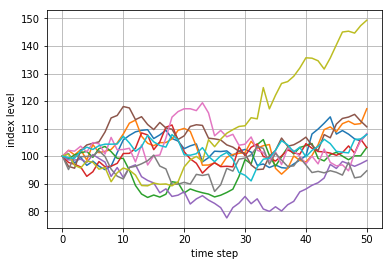

In [46]:
# Histogram of all simulated end of period index level valuesplt.hist(S[-1], bins=50)
import matplotlib.pyplot as plt
plt.plot(S[:, :10])
plt.grid(True); plt.xlabel('time step'); plt.ylabel('index level')

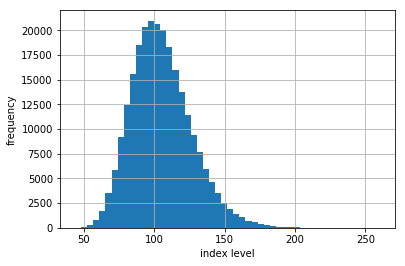

In [47]:
# Histogram of all simulated end of period index level values
plt.hist(S[-1], bins=50)
plt.grid(True); plt.xlabel('index level'); plt.ylabel('frequency')

(0, 50000)

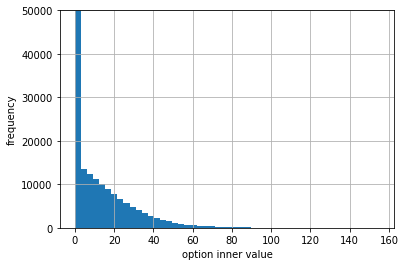

In [48]:
# Histogram of all simulated end of period option inner values
plt.hist(np.maximum(S[-1] - K, 0), bins=50)
plt.grid(True); plt.xlabel('option inner value'); plt.ylabel('frequency'); plt.ylim(0, 50000)

In [49]:
# 옵션은 만기에 가까울수록 가치가 적음을 시각화로 구현한다
sum(S[-1] < K)

133533

<br></br><br></br>
## 4 기술적 분석
과거 시장정보를 활용해, 미래의 주가방향을 예측

### 01 데이터 읽기 및 추세선 계산하기
by Google Finance 

In [50]:
import numpy as np
import pandas as pd
from pandas_datareader import get_data_google

In [51]:
SPY = get_data_google('SPY', '2000-1-1', '2014-4-14')
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3590 entries, 2000-01-03 to 2014-04-14
Data columns (total 5 columns):
Open      3571 non-null float64
High      3571 non-null float64
Low       3571 non-null float64
Close     3590 non-null float64
Volume    3590 non-null int64
dtypes: float64(4), int64(1)
memory usage: 168.3 KB


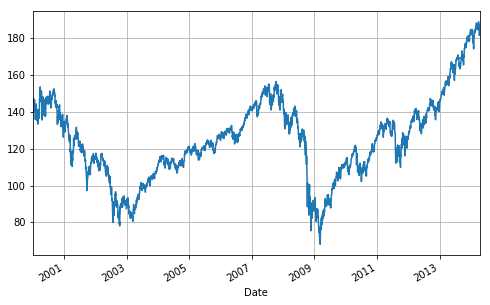

In [52]:
# S&P 500 지수 시계열 정보를 가져온다
SPY['Close'].plot(grid=True, figsize=(8, 5))

In [53]:
# 42일 , 252일 추세선을 계산해서 출력한다
SPY['42d'] = np.round(SPY['Close'].rolling(window=42).mean(), 2)
SPY['252d'] = np.round(SPY['Close'].rolling(window=252).mean(), 2)
SPY[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2014-04-08,185.10,185.52,172.97
2014-04-09,187.09,185.70,173.08
2014-04-10,183.16,185.77,173.18
2014-04-11,181.51,185.76,173.27
2014-04-14,182.94,185.78,173.38


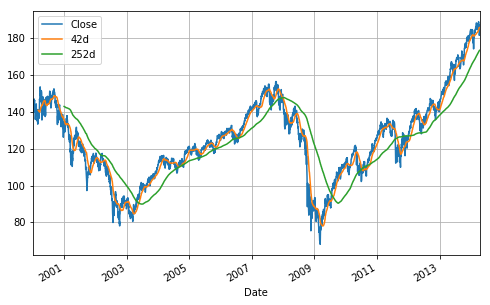

In [54]:
# title: The S&P 500 index with 42d and 252d trend lines
SPY[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

### 02 매매 신호규칙 생성하기
매수/ 대기/ 매도신호를 42일추세와 252일추세로 추출

In [55]:
# 매수신호(주식매수) : 42일 추세가, 252일 추세보다 SD만큼 위에 도달하였을때
# 대기신호(현금보유) : 42일 추세가, 252일 추세 위/아래 SD값 사이에 있을때
# 매도신호(주식공매도) : 42일 추세가, 252일 추세보다 SD만큼 아래에 도달하였을때

In [56]:
SPY['42-252'] = SPY['42d'] - SPY['252d']
SPY['42-252'].tail()

Date
2014-04-08    12.55
2014-04-09    12.62
2014-04-10    12.59
2014-04-11    12.49
2014-04-14    12.40
Name: 42-252, dtype: float64

In [57]:
SPY['42-252'].head()

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: 42-252, dtype: float64

In [58]:
SD = 5
SPY['Regime'] = np.where(SPY['42-252'] > SD, 1, 0)
SPY['Regime'] = np.where(SPY['42-252'] < -SD, -1, SPY['Regime'])
SPY['Regime'].value_counts()

 1    1470
 0    1254
-1     866
Name: Regime, dtype: int64

In [59]:
# 42일 추세가 위에 있었던 날 : 1470일
# 42일 추세가 아래에 있었던 날 : 1254일
# 위/아래를 교차하는 기간이 '매매영역'이 된다

(-1.1, 1.1)

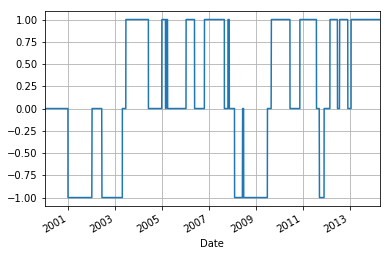

In [60]:
# Signal regimes over time
SPY['Regime'].plot(lw=1.5, grid=True)
plt.ylim([-1.1, 1.1])

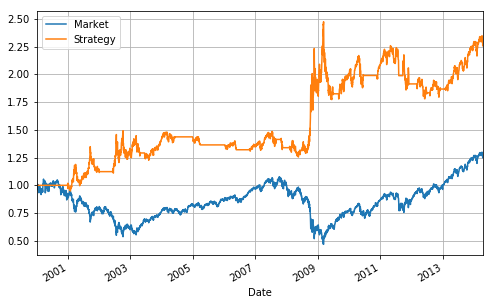

In [61]:
SPY['Market'] = np.log(SPY['Close'] / SPY['Close'].shift(1))
SPY['Strategy'] = SPY['Regime'].shift(1) * SPY['Market']

# The S&P 500 index vs. investor's wealth
SPY[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,
                                                    figsize=(8, 5))